
# K-Nearest Neighbors (KNN) Classification  
## Decision Boundary Visualization using Iris Dataset

### Objective
In this assignment, you will:
- Load and explore a real dataset (Iris)
- Implement KNN using scikit-learn
- Observe predictions for different values of **k**
- Visualize decision boundaries
- Analyze the effect of distance metrics

**Important Instructions**
- Do NOT use GridSearchCV or RandomizedSearchCV
- Change values of `k` manually
- Use only two features and two classes



## Task 1: Load and Explore the Dataset
We will use the Iris dataset from `sklearn`.  
Only:
- Features: Sepal Length, Sepal Width  
- Classes: Setosa (0) and Versicolor (1)


In [58]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()

X = iris.data[:, :2]   # sepal length, sepal width
y = iris.target

# Keep only class 0 and 1
mask = y < 2
X = X[mask]
y = y[mask]

print("Shape of X:", X.shape)
print("Class distribution:", np.bincount(y))

df = pd.DataFrame(X, columns=["Sepal Length", "Sepal Width"])
df["Class"] = y
df.head()


Shape of X: (100, 2)
Class distribution: [50 50]


,Sepal Length,Sepal Width,Class
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [59]:
df.head()

,Sepal Length,Sepal Width,Class
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0



## Task 2: Visualize the Dataset


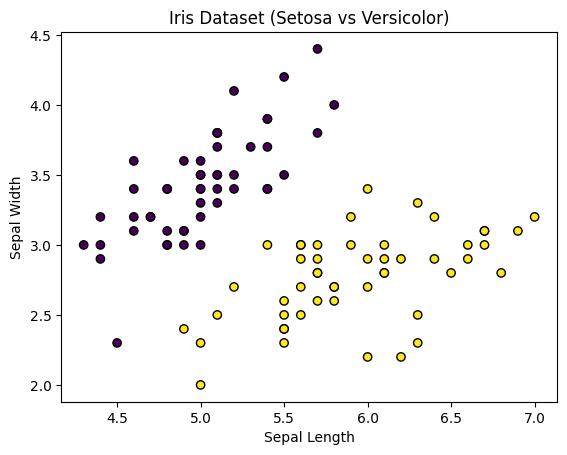

In [60]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Iris Dataset (Setosa vs Versicolor)")
plt.show()


## Task 3: Train a Basic KNN Model (k = 3)


1) split the data into Train data and Test data
2) Fit a KNeighborsClassifier
3) Make the prediction
4) Check for the accuracy

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                   test_size=0.3,
                                   shuffle=True)
print("Original data shape:", X.shape)
print("Training data shape (X_train):", X_train.shape)
print("Test data shape (X_test):", X_test.shape)


Original data shape: (100, 2)
Training data shape (X_train): (70, 2)
Test data shape (X_test): (30, 2)


In [62]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
# Fit the model using the training data
neigh.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [63]:
# Make predictions on the test data
y_pred = neigh.predict(X_test)

In [64]:
# Check the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy on the test set: {accuracy:.2f}")

Model accuracy on the test set: 1.00



## Task 4: Predictions for Different Values of k


Accuracy scores for different k values: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


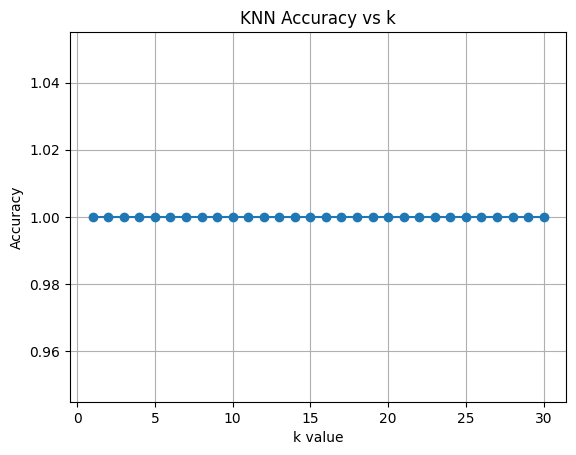

In [65]:
from sklearn.metrics import accuracy_score
import numpy as np

k_values = [i for i in range(1, 31)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)

print("Accuracy scores for different k values:", scores)

# Plot the results
plt.plot(k_values, scores, marker='o')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs k')
plt.grid(True)
plt.show()


## Task 5: Decision Boundary Function (Provided)


In [66]:

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.02),
        np.arange(y_min, y_max, 0.02)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.title(title)
    plt.show()



## Task 6: Decision Boundary for Different Values of k


Plotting decision boundaries for different k values...


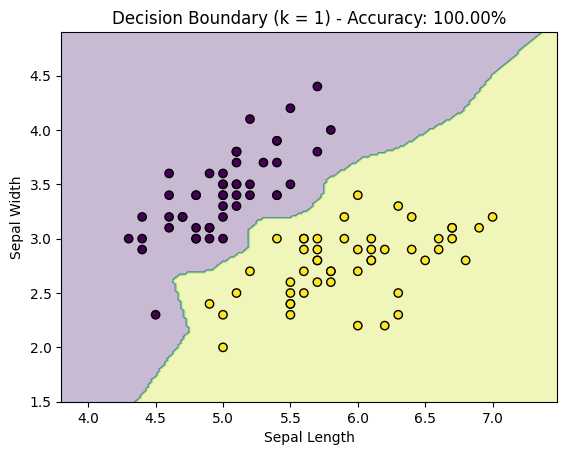

k =  1 | Training Accuracy = 1.0000


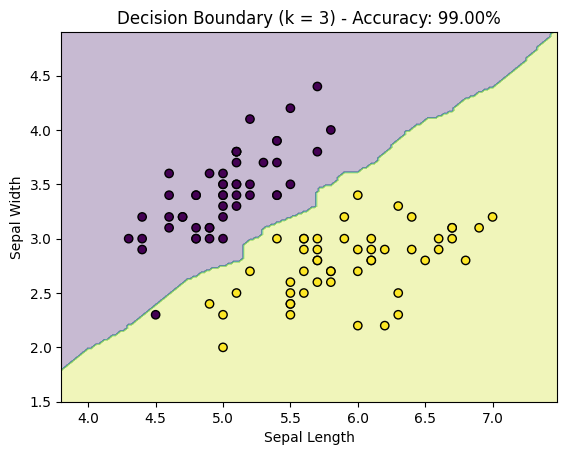

k =  3 | Training Accuracy = 0.9900


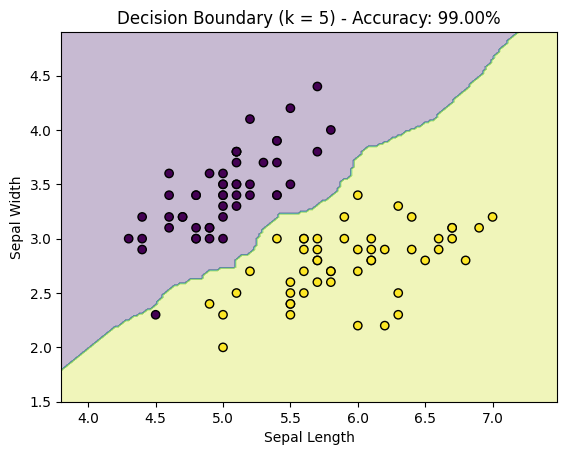

k =  5 | Training Accuracy = 0.9900


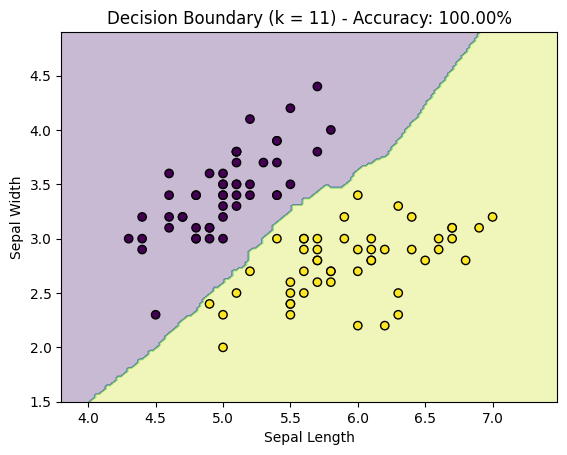

k = 11 | Training Accuracy = 1.0000


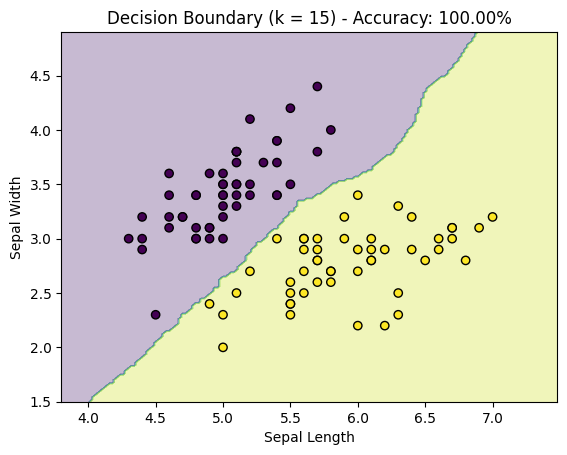

k = 15 | Training Accuracy = 1.0000


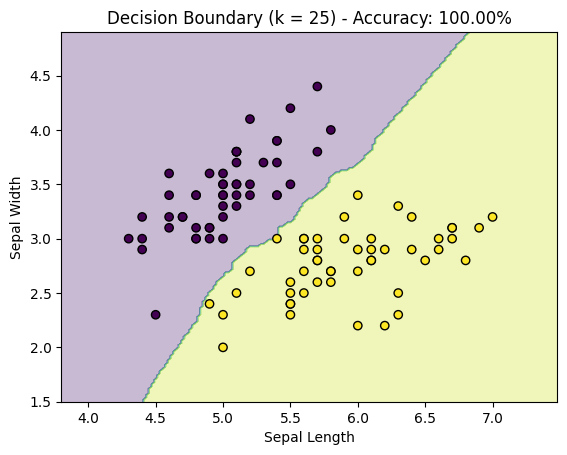

k = 25 | Training Accuracy = 1.0000


In [67]:
# Use the FILTERED data (2 features, 2 classes)
X_filtered = df[['Sepal Length', 'Sepal Width']].values
y_filtered = df['Class'].values

# Test different k values
k_values = [1, 3, 5, 11, 15, 25]

print("Plotting decision boundaries for different k values...")

for k in k_values:
    # Train the model on filtered data
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_filtered, y_filtered)

    # Calculate training accuracy
    train_accuracy = model.score(X_filtered, y_filtered)

    # Plot decision boundary
    title = f"Decision Boundary (k = {k}) - Accuracy: {train_accuracy:.2%}"
    plot_decision_boundary(model, X_filtered, y_filtered, title)

    print(f"k = {k:2d} | Training Accuracy = {train_accuracy:.4f}")


## Task 7: Effect of Distance Metric
Fix k = 5 and compare Euclidean vs Manhattan distance


In [68]:
# Plot a decision boundary when using k=5 and change the distance

   Training Accuracy: 0.9900


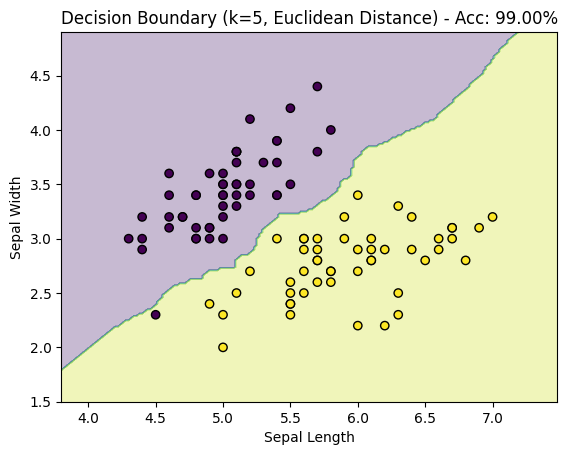

   Training Accuracy: 1.0000


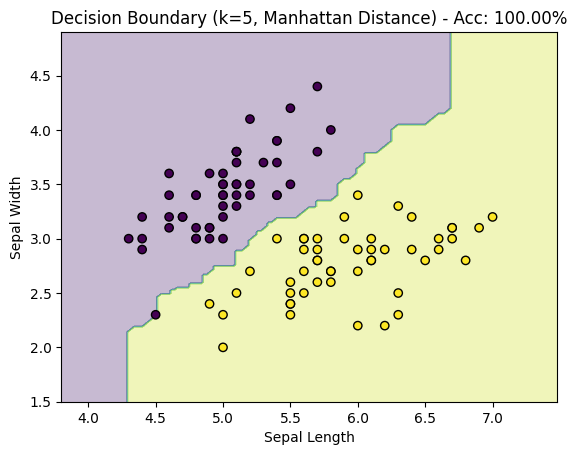

Euclidean Distance  - Accuracy: 0.9900
Manhattan Distance  - Accuracy: 1.0000
Difference: 0.0100
- Euclidean is more sensitive to diagonal differences
- Manhattan treats horizontal and vertical distances equally


In [71]:
k_fixed = 5
# Euclidean Distance (p=2)
model_euclidean = KNeighborsClassifier(n_neighbors=k_fixed, p=2)
model_euclidean.fit(X_filtered, y_filtered)
accuracy_euclidean = model_euclidean.score(X_filtered, y_filtered)
print(f"   Training Accuracy: {accuracy_euclidean:.4f}")

plot_decision_boundary(
    model_euclidean,
    X_filtered,
    y_filtered,
    title=f"Decision Boundary (k={k_fixed}, Euclidean Distance) - Acc: {accuracy_euclidean:.2%}"
)

# Manhattan Distance (p=1)
model_manhattan = KNeighborsClassifier(n_neighbors=k_fixed, p=1)
model_manhattan.fit(X_filtered, y_filtered)
accuracy_manhattan = model_manhattan.score(X_filtered, y_filtered)
print(f"   Training Accuracy: {accuracy_manhattan:.4f}")

plot_decision_boundary(
    model_manhattan,
    X_filtered,
    y_filtered,
    title=f"Decision Boundary (k={k_fixed}, Manhattan Distance) - Acc: {accuracy_manhattan:.2%}"
)

print(f"Euclidean Distance  - Accuracy: {accuracy_euclidean:.4f}")
print(f"Manhattan Distance  - Accuracy: {accuracy_manhattan:.4f}")
print(f"Difference: {abs(accuracy_euclidean - accuracy_manhattan):.4f}")

print("- Euclidean is more sensitive to diagonal differences")
print("- Manhattan treats horizontal and vertical distances equally")


## Task 8: Observations (Answer in Markdown)
1. How do predictions change as k increases?
2. Which k value gives the most complex decision boundary?
3. Why does k = 1 behave differently?
4. How does distance metric affect results?
5. Which configuration would you choose and why?


1. the predictions changes are like this when the k value increases the decision
boundary also increased the area and the accuracy of data is also increased.

2. k=1 produces the most complex and 'jagged' decision boundary. This is because the classification for each point is solely determined by its single nearest neighbor, making the boundary highly sensitive to every individual training data point.

3. When k=1, the classification of a new data point is determined only by its single nearest neighbor. This results in a highly flexible decision boundary that can closely follow the contours of the training data, often leading to overfitting. It's very sensitive to outliers or noise in the dataset, creating a more complex and potentially erratic boundary compared to larger k values that smooth out these local variations.

4. The chosen distance metric shapes the local neighborhoods, directly influencing the complex, often jagged, decision boundaries of the KNN classifier.

5. I think the best configuration for this data set is distance metric.As the iris dataset is small it we can easily calculate and plot the distances and predict the values or decision boundary.
(Based on the cross-validation scores for different k values, k=6, 7, 8, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26 all yielded a mean cross-validation score of 1.0. A k value between 6 and 10 would likely be a good balance between complexity and generalization. Regarding the distance metric, both Euclidean and Manhattan distances produced clear decision boundaries for this dataset. The choice between them often depends on the nature of the features and domain knowledge; if features represent independent dimensions, Euclidean is often preferred. If differences along each dimension are equally important regardless of the total distance, Manhattan might be more suitable. For this dataset, both appear to perform well, but a slightly larger k with either metric would offer good generalization without being overly complex or underfitting.)